In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('/Users/macbookpro/Downloads/Insurance.csv')

print(data.shape)

data.head()

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
data['sex'].value_counts()


male      676
female    662
Name: sex, dtype: int64

In [8]:
data['age'].value_counts()

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64

In [9]:
data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [10]:
data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [11]:
data['region'].value_counts()


southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [12]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

Text(0.5, 1.0, 'Age vs Charges')

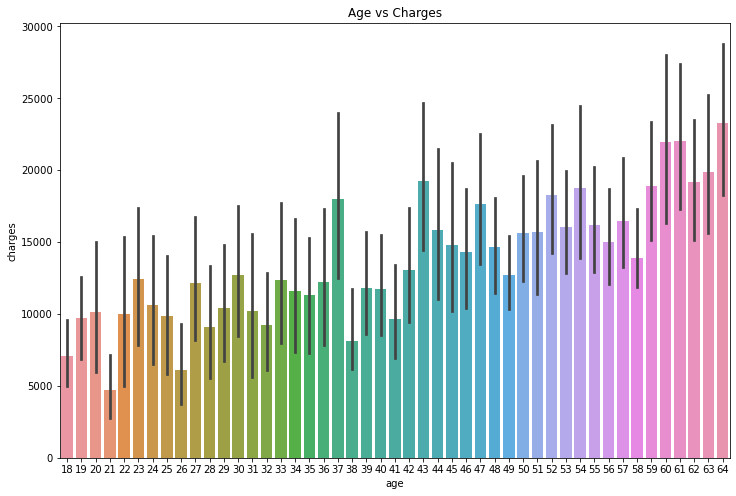

In [13]:
# Age vs Charges
# the more the age the more will be insurance charge (roughly estimated)

plt.figure(figsize = (12, 8))
sns.barplot(x = 'age', y = 'charges', data = data)

plt.title("Age vs Charges")

Text(0.5, 1.0, 'sex vs charges')

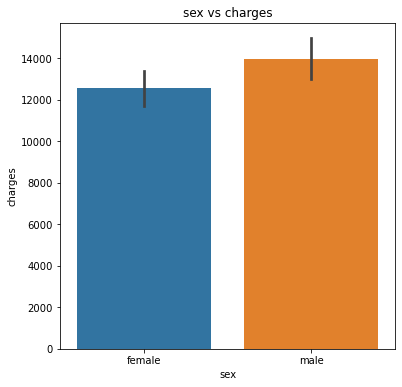

In [14]:
# sex vs charges
# males have slightly greater insurance charges than females in general

plt.figure(figsize = (6, 6))
sns.barplot(x = 'sex', y = 'charges', data = data)

plt.title('sex vs charges')

Text(0.5, 1.0, 'children vs charges')

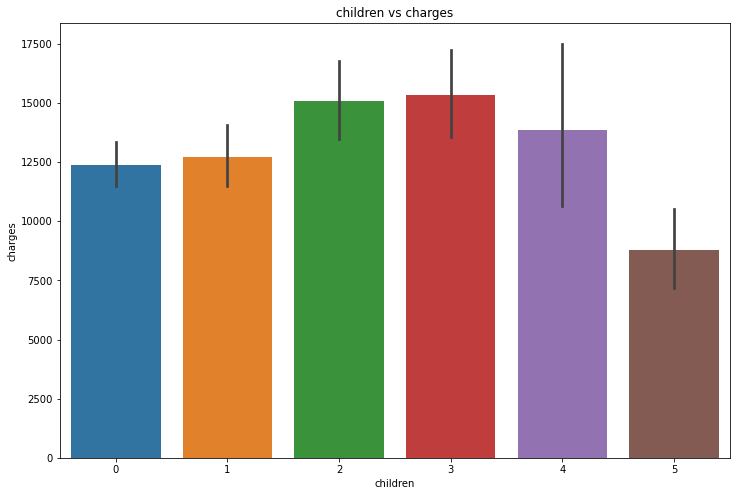

In [15]:
# children vs charges
# no. of childrens of a person has a very interesting dependency on insurance costs

plt.figure(figsize = (12, 8))
sns.barplot(x = 'children', y = 'charges', data = data)

plt.title('children vs charges')

Text(0.5, 1.0, 'region vs charges')

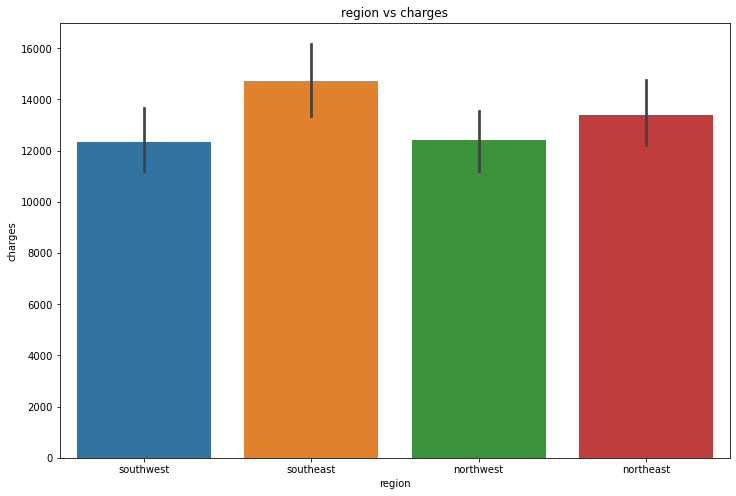

In [16]:
# region vs charges
# From the graph we can see that the region actually does not play any role in determining the insurance charges

plt.figure(figsize = (12, 8))
sns.barplot(x = 'region', y = 'charges', data = data)

plt.title('region vs charges')

Text(0.5, 1.0, 'smoker vs charges')

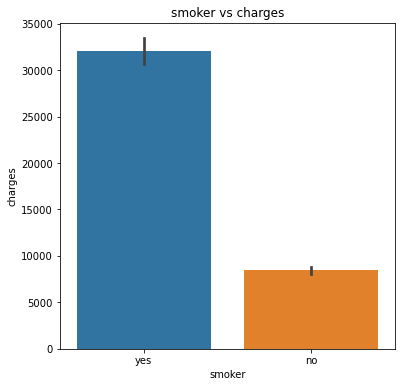

In [17]:
# smoker vs charges
# from the graph below, it is visible that smokers have more insurance charges than the non smokers

plt.figure(figsize = (6, 6))
sns.barplot(x = 'smoker', y = 'charges', data = data)

plt.title('smoker vs charges')

<AxesSubplot:>

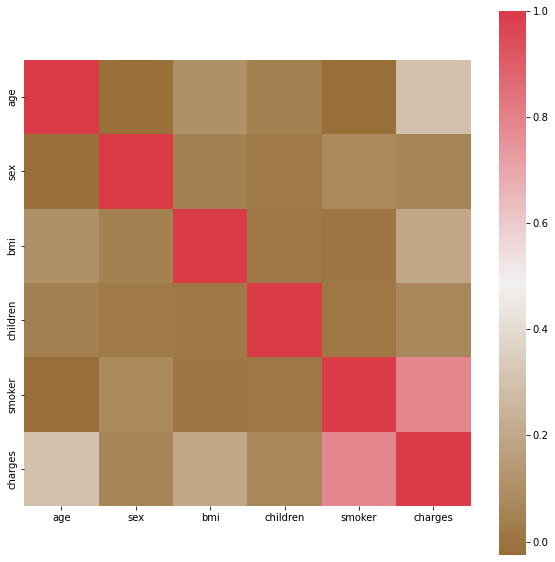

In [44]:
# plotting the correlation plot for the dataset

f, ax = plt.subplots(figsize = (10, 10))

corr = data.corr()
sns.heatmap(corr, mask = np.zeros_like(corr, dtype = bool), 
            cmap = sns.diverging_palette(50, 10, as_cmap = True), square = True, ax = ax)


In [20]:
# removing unnecassary columns from the dataset

data = data.drop('region', axis = 1)

print(data.shape)

data.columns

(1338, 6)


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges'], dtype='object')

In [22]:
# label encoding for sex and smoker

# importing label encoder
from sklearn.preprocessing import LabelEncoder

# creating a label encoder
le = LabelEncoder()


# label encoding for sex
# 0 for females and 1 for males
data['sex'] = le.fit_transform(data['sex'])

# label encoding for smoker
# 0 for smokers and 1 for non smokers
data['smoker'] = le.fit_transform(data['smoker'])

In [23]:
data['sex'].value_counts()

1    676
0    662
Name: sex, dtype: int64

In [24]:
data['smoker'].value_counts()

0    1064
1     274
Name: smoker, dtype: int64

In [25]:
# splitting the dependent and independent variable

x = data.iloc[:,:5]
y = data.iloc[:,5]

print(x.shape)
print(y.shape)

(1338, 5)
(1338,)


In [32]:
# splitting the dataset into training and testing sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 30)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(1070, 5)
(268, 5)
(1070,)
(268,)


In [33]:
# standard scaling

from sklearn.preprocessing import StandardScaler

# creating a standard scaler
sc = StandardScaler()

# feeding independents sets into the standard scaler
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


# creating the model
model = LinearRegression()

# feeding the training data to the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# calculating the mean squared error
mse = np.mean((y_test - y_pred)**2, axis = None)
print("MSE :", mse)

# Calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

# Calculating the r2 score
r2 = r2_score(y_test, y_pred)
print("r2 score :", r2)

MSE : 37806750.25007653
RMSE : 6148.719399198221
r2 score : 0.7549043319540902


In [35]:
y_test

338    41919.09700
620     3659.34600
965     4746.34400
128    32734.18630
329     9144.56500
          ...     
580    12913.99240
786    12741.16745
321    24671.66334
903     8125.78450
613     6753.03800
Name: charges, Length: 268, dtype: float64

In [36]:
y_pred

array([34463.03582081,  5351.63285316,  5380.9763682 , 25960.03740848,
       12496.7519736 ,  6408.63819349,  4081.62037308,  9300.34454944,
       32957.30705757, 10937.63104598,  7519.13584334,  9726.30820152,
       34438.32925237, 11046.23596617,   819.90626006, 35368.51634447,
       11430.73775682,  8747.50405981, 28520.23066838, 10780.77269818,
         885.55261833,  8140.91449068,  7686.87521254, 10734.04414171,
       32605.85490348, 38733.33147903, 14385.6266007 ,  2947.77854767,
       10456.87417122, 14224.24201886,  1675.51537561, 30193.11285619,
         944.28091937, 14459.05536274, 12261.67368565,  8411.64973742,
        1863.86250159,  6487.85043844,   186.61387983,  8192.76868362,
        6366.87004436, 33513.53920691,  2007.49195393, 13551.24985198,
       10145.95016308, 29556.16908321,  4878.71697149,  2536.59789849,
        2321.4068302 ,  4974.23941116, 10987.31701618, 12416.97110239,
       11958.11247547,   878.6345611 , 10867.31696491,  7014.47673418,
      

In [37]:
from sklearn.svm import SVR

# creating the model
model = SVR()

# feeding the training data to the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# calculating the mean squared error
mse = np.mean((y_test - y_pred)**2, axis = None)
print("MSE :", mse)

# Calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

# Calculating the r2 score
r2 = r2_score(y_test, y_pred)
print("r2 score :", r2)

MSE : 174595630.81989565
RMSE : 13213.46399775228
r2 score : -0.13187810353027452


In [38]:
from sklearn.ensemble import RandomForestRegressor

# creating the model
model = RandomForestRegressor(n_estimators = 40, max_depth = 4, n_jobs = -1)

# feeding the training data to the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# calculating the mean squared error
mse = np.mean((y_test - y_pred)**2, axis = None)
print("MSE :", mse)

# Calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

# Calculating the r2 score
r2 = r2_score(y_test, y_pred)
print("r2 score :", r2)

MSE : 21511136.712738026
RMSE : 4638.009994894149
r2 score : 0.8605464265465463


In [39]:
print(y_pred)

[44856.31313392  5475.82208971  5958.94852042 16454.21967513
 10447.50197826  5613.91155641  2721.94329264 10838.00150147
 44631.53272998 13086.371788    6831.11939538 10153.63116396
 45027.02440746 12967.84331341  2721.94329264 24777.03403242
 10085.23930006  8984.49929538 17941.51367495  9892.9233862
  2721.94329264  6416.9025591  10455.34745395  7837.75873959
 25413.30334687 45635.72383364 13902.68861089  5123.26802021
  7194.21155201 10892.37082274  5422.16960607 37658.70495852
  2800.31197128 10547.32385354 13086.371788    6416.9025591
  2721.94329264  6782.13248002  2721.94329264  6338.39063527
  6368.33614654 23658.71033992  4522.06508072 13086.371788
  6835.7106537  38840.32676458  6238.14374382  2721.94329264
  3594.45001911  6696.48769002  7383.55802972  9927.51538191
 13086.371788    2721.94329264  7194.21155201  7522.70948907
 20064.16739637  4983.20260573 13086.371788    6323.86365437
 13235.88850195  6508.75757572 11139.93073174  4945.44786131
  2721.94329264  5475.822089

In [40]:
print(y_test)


338    41919.09700
620     3659.34600
965     4746.34400
128    32734.18630
329     9144.56500
          ...     
580    12913.99240
786    12741.16745
321    24671.66334
903     8125.78450
613     6753.03800
Name: charges, Length: 268, dtype: float64


In [41]:
from sklearn.tree import DecisionTreeRegressor

# creating the model
model = DecisionTreeRegressor()

# feeding the training data to the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# calculating the mean squared error
mse = np.mean((y_test - y_pred)**2, axis = None)
print("MSE :", mse)

# Calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

# Calculating the r2 score
r2 = r2_score(y_test, y_pred)
print("r2 score :", r2)

MSE : 41200225.68812585
RMSE : 6418.7401947832295
r2 score : 0.7329049238064831
